In [167]:
''' import packages '''
import pandas as pd
import numpy as np

In [168]:
#import sklearn package
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [169]:
# data plotting package
import matplotlib.pyplot  as plt

In [170]:
# memory management
import gc

In [171]:
''' Read data '''
HA_data = pd.read_csv("heart.csv")

In [172]:
print ("Head of data : \n", HA_data.head(5))
print ("Tail of data: \n", HA_data.tail(5))


Head of data : 
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Tail of data: 
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0      

Generating Summary Statistics

In [173]:
print ("Size of the data set: ", HA_data.size)

HA_summary = HA_data.describe()
HA_summary

Size of the data set:  4242


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [174]:
print ("columns for HA_data", HA_data.columns)

columns for HA_data Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [175]:
print ("Data contains null value: \n", HA_data.isnull().sum())

Data contains null value: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Plotting Histograms for Continuous Variables. 

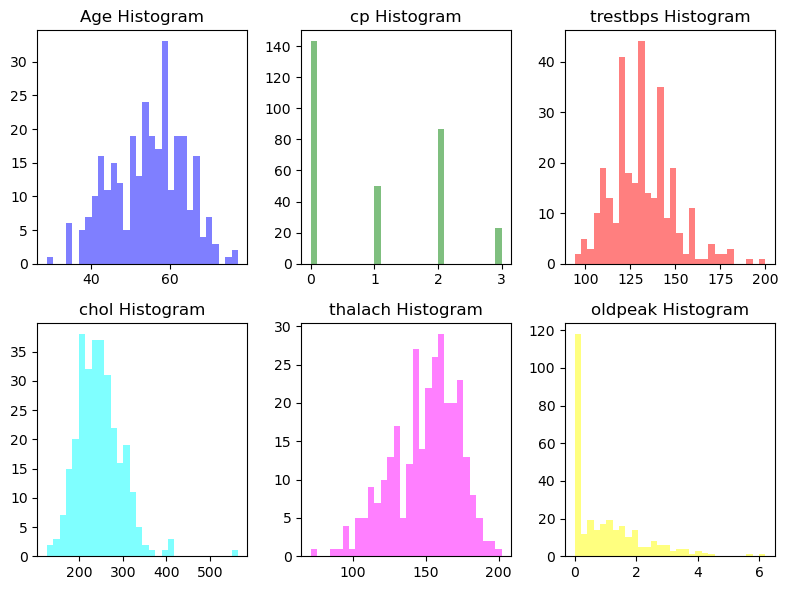

In [176]:

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(ncols=3, nrows=2, figsize=(8, 6))

ax0.hist(HA_data['age'], bins=30, alpha=0.5, label='age', color='blue')
ax0.set_title('Age Histogram')

ax1.hist(HA_data['cp'], bins=30, alpha=0.5, label='cp', color='green')
ax1.set_title('cp Histogram')

ax2.hist(HA_data['trestbps'], bins=30, alpha=0.5, label='trestbps', color='red')
ax2.set_title('trestbps Histogram')

ax3.hist(HA_data['chol'], bins=30, alpha=0.5, label='chol', color='cyan')
ax3.set_title('chol Histogram')

ax4.hist(HA_data['thalach'], bins=30, alpha=0.5, label='thalach', color='magenta')
ax4.set_title('thalach Histogram')

ax5.hist(HA_data['oldpeak'], bins=30, alpha=0.5, label='oldpeak', color='yellow')
ax5.set_title('oldpeak Histogram')

fig.tight_layout()
plt.show()

Histograms for Categorical and Additional Variables.

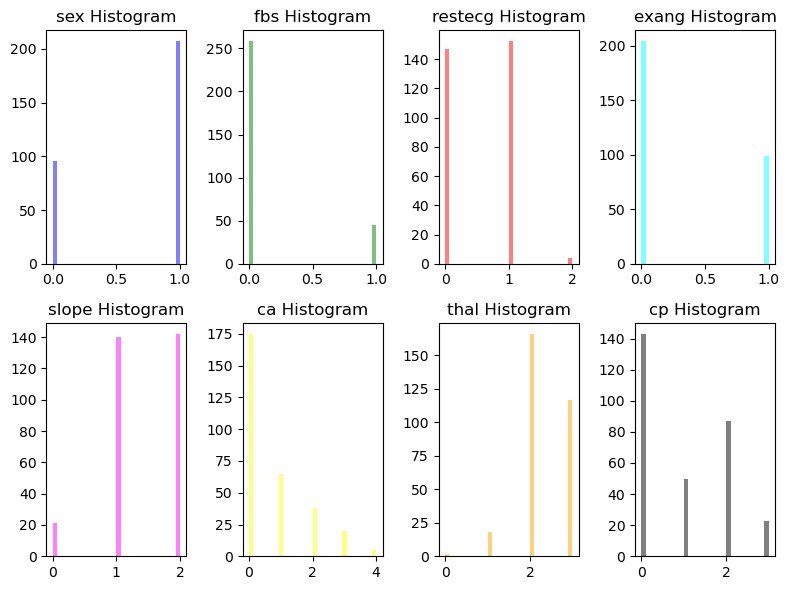

In [177]:
#define subbplot 4*2
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(ncols=4, nrows=2, figsize=(8, 6))

ax0.hist(HA_data['sex'], bins=30, alpha=0.5, label='sex', color='blue')
ax0.set_title('sex Histogram')

ax1.hist(HA_data['fbs'], bins=30, alpha=0.5, label='fbs', color='green')
ax1.set_title('fbs Histogram')

ax2.hist(HA_data['restecg'], bins=30, alpha=0.5, label='restecg', color='red')
ax2.set_title('restecg Histogram')

ax3.hist(HA_data['exang'], bins=30, alpha=0.5, label='exang', color='cyan')
ax3.set_title('exang Histogram')

ax4.hist(HA_data['slope'], bins=30, alpha=0.5, label='slope', color='magenta')
ax4.set_title('slope Histogram')

ax5.hist(HA_data['ca'], bins=30, alpha=0.5, label='ca', color='yellow')
ax5.set_title('ca Histogram')

ax6.hist(HA_data['thal'], bins=30, alpha=0.5, label='thal', color='orange')
ax6.set_title('thal Histogram')

ax7.hist(HA_data['cp'], bins=30, alpha=0.5, label='cp', color='black')
ax7.set_title('cp Histogram')

fig.tight_layout()
plt.show()

In [178]:
xvar = HA_data.drop("target", axis=1) 
yvar = HA_data["target"]

In [179]:
#Separating Numeric and Categorical Features

xvarnorm = xvar[["age", "trestbps", "chol", "thalach", "oldpeak"]]
xvarcat = xvar.drop(columns=["age", "trestbps", "chol", "thalach", "oldpeak"], axis=1)

In [180]:
print (xvarnorm.head(5))
print (xvarcat.head(5))
print (yvar.head(5))

   age  trestbps  chol  thalach  oldpeak
0   63       145   233      150      2.3
1   37       130   250      187      3.5
2   41       130   204      172      1.4
3   56       120   236      178      0.8
4   57       120   354      163      0.6
   sex  cp  fbs  restecg  exang  slope  ca  thal
0    1   3    1        0      0      0   0     1
1    1   2    0        1      0      0   0     2
2    0   1    0        0      0      2   0     2
3    1   1    0        1      0      2   0     2
4    0   0    0        1      1      2   0     2
0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


In [181]:
# scaling xvarnorm using Z distribution; Initialize the scaler
scaler = StandardScaler()

#Fit & Transform the Numerical Features
xvarnorm = scaler.fit_transform(xvarnorm)


In [182]:

xvarnorm = pd.DataFrame(xvarnorm, columns=("age", "trestbps", "chol", "thalach", "oldpeak"))

In [183]:
print ("standardized data: \n", xvarnorm.head(5))

standardized data: 
         age  trestbps      chol   thalach   oldpeak
0  0.952197  0.763956 -0.256334  0.015443  1.087338
1 -1.915313 -0.092738  0.072199  1.633471  2.122573
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705
4  0.290464 -0.663867  2.082050  0.583939 -0.379244


In [184]:
#Concatenating the Preprocessed Features
xvar = pd.concat([xvarnorm, xvarcat], axis=1)
print ("modified xvar with cat and normalized data: \n", xvar.head(5))

modified xvar with cat and normalized data: 
         age  trestbps      chol   thalach   oldpeak  sex  cp  fbs  restecg  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338    1   3    1        0   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573    1   2    0        1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912    0   1    0        0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705    1   1    0        1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244    0   0    0        1   

   exang  slope  ca  thal  
0      0      0   0     1  
1      0      0   0     2  
2      0      2   0     2  
3      0      2   0     2  
4      1      2   0     2  


In [185]:
x_train, x_test, y_train, y_test = train_test_split(xvar, yvar, test_size=0.15)

In [186]:
print ("shape of train : ", x_train.shape, y_train.shape)
print ("shape of test : ", x_test.shape, y_test.shape)

shape of train :  (257, 13) (257,)
shape of test :  (46, 13) (46,)


In [187]:
seed = np.random.seed(42)

In [188]:
# K fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [189]:
# logistic regression
model = LogisticRegression(max_iter=150, random_state=seed)

In [190]:
# hyperparameter grid for tuning the Logistic Regression model
param_grid = {
    'C': [0.01,0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25],  
    'solver': ['saga', 'liblinear', 'lbfgs'],  # Optimization algorithms
    'penalty':["l2", "l1"]
}

In [191]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=10,
                           scoring='f1_micro',
                           n_jobs=-1)

In [192]:
grid_search.fit(x_train, y_train)

/opt/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/dsi_participant/li

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=150), n_jobs=-1,
             param_grid={'C': [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15,
                               0.175, 0.2, 0.25],
                         'penalty': ['l2', 'l1'],
                         'solver': ['saga', 'liblinear', 'lbfgs']},
             scoring='f1_micro')

In [193]:
print("Best parameters: \n", grid_search.best_params_)
print("Best cross-validation score: \n", grid_search.best_score_)

Best parameters: 
 {'C': 0.15, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 
 0.8516923076923077


In [194]:
scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='f1_micro')
print("Cross-validation scores:", scores)
print("Mean f1:", scores.mean())


Cross-validation scores: [0.92307692 0.80769231 0.80769231 0.69230769 0.88461538 0.84615385
 0.84615385 0.92       0.8        0.92      ]
Mean f1: 0.8447692307692309


In [195]:
# Define and train Logistic Regression model
#model = LogisticRegression(penalty='l2', C=0.1, solver='saga', max_iter=100, random_state=seed)
model = LogisticRegression(penalty='l2', C=0.125, solver='saga', max_iter=150, random_state=seed)
model = model.fit(x_train, y_train)

In [196]:
train_pred_prob = model.predict_log_proba(x_train)
print ("training log probability : \n", pd.DataFrame(train_pred_prob))

training log probability : 
             0         1
0   -1.100472 -0.404536
1   -0.158340 -1.921134
2   -0.042769 -3.173250
3   -1.969416 -0.150286
4   -1.543935 -0.240212
..        ...       ...
252 -0.323011 -1.287230
253 -1.165405 -0.373670
254 -2.494020 -0.086187
255 -0.090637 -2.445866
256 -1.762396 -0.188299

[257 rows x 2 columns]


In [197]:
y_test_pred = model.predict(x_test)

In [198]:
Accuracy = accuracy_score(y_test, y_test_pred)
Recall = recall_score(y_test, y_test_pred)
Precision = precision_score(y_test, y_test_pred)
F1 = f1_score(y_test, y_test_pred, average='micro')

In [199]:
print(f"The Accuracy of the model is: {Accuracy}")
print(f"The Recall of the model is: {Recall}")
print(f"The Precision of the model is: {Precision}")
print(f"The F1 of the model is: {F1}")

The Accuracy of the model is: 0.8043478260869565
The Recall of the model is: 0.95
The Precision of the model is: 0.7037037037037037
The F1 of the model is: 0.8043478260869565


In [200]:
#The model has high recall, meaning it detects most patients with heart disease.

#Precision is lower than recall, indicating some false positives.

#Overall F1 score and accuracy (~80%) show strong predictive performance on unseen test data.

In [201]:
test_pred_prob = model.predict_proba(x_test)[:,1]
aucScore = roc_auc_score(y_test, test_pred_prob)
print(f"AUC: {aucScore}")

AUC: 0.8980769230769231


In [202]:
# The Logistic Regression model achieved an AUC of 0.898, 
# indicating strong discriminative ability in distinguishing patients with and without heart disease.

In [203]:
# y_test are the true labels and y_scores are the predicted probabilities
fpr, tpr, threshold = roc_curve(y_test, test_pred_prob)

In [204]:
print ("fpr, tpr: ", fpr, tpr)


fpr, tpr:  [0.         0.         0.         0.03846154 0.03846154 0.07692308
 0.07692308 0.11538462 0.11538462 0.15384615 0.15384615 0.26923077
 0.26923077 0.30769231 0.30769231 1.        ] [0.   0.05 0.35 0.35 0.4  0.4  0.65 0.65 0.7  0.7  0.8  0.8  0.85 0.85
 1.   1.  ]


In [205]:
roc_auc = auc(fpr, tpr)

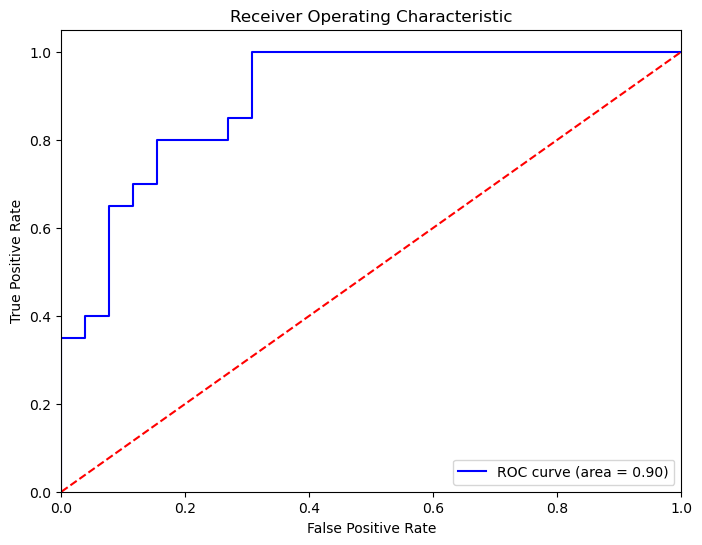

In [206]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Support Vector Machine

In [207]:
param_grid = {
    'C': [15, 20, 25, 30, 35],
    'gamma': [0.001, 0.0025, 0.005, 0.0065, 0.0075],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [208]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ...................C=15, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=15, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=15, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=15, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=15, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=15, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=15, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=15, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=15, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .....................C=15, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=15, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=15, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [15, 20, 25, 30, 35],
                         'gamma': [0.001, 0.0025, 0.005, 0.0065, 0.0075],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [209]:
predictions = grid.predict(x_test)
print("SVM Classificition Report: \n", classification_report(y_test, predictions))

SVM Classificition Report: 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.69      0.90      0.78        20

    accuracy                           0.78        46
   macro avg       0.80      0.80      0.78        46
weighted avg       0.81      0.78      0.78        46



In [210]:
print("SVM best grid params: ", grid.best_params_)
print("SVM Best estimator: ", grid.best_estimator_)

SVM best grid params:  {'C': 25, 'gamma': 0.0075, 'kernel': 'rbf'}
SVM Best estimator:  SVC(C=25, gamma=0.0075)


In [211]:
del (predictions, grid, param_grid, roc_auc, auc, fpr, tpr, threshold, aucScore, test_pred_prob)
gc.collect()

24476

Random Forest

In [212]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [213]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [5, 10, 15],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [214]:
# Set up K-Fold cross-validation
cv = StratifiedKFold(n_splits=5)

In [215]:
# Set up Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)


In [216]:
# Fit the model
print ("\n ---- training RF -----")
grid_search.fit(x_train, y_train)


 ---- training RF -----


/opt/miniconda3/envs/dsi_participant/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy')

In [217]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 10}


In [218]:
# Make predictions
y_pred = grid_search.predict(x_test)

In [219]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        26
           1       0.64      0.90      0.75        20

    accuracy                           0.74        46
   macro avg       0.77      0.76      0.74        46
weighted avg       0.78      0.74      0.74        46



In [220]:
del (HA_data,HA_summary,fig, ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, plt, pd, xvar,
            yvar, xvarnorm, xvarcat, scaler, x_train, x_test, y_train, y_test,
            kf, model, scores, param_grid, grid_search, np, Accuracy, Recall,
            Precision, y_pred, best_params, cv, rf, F1, y_test_pred, train_pred_prob, seed,
            GridSearchCV,RandomForestClassifier,SVC , confusion_matrix,classification_report,
            roc_curve,roc_auc_score, f1_score, precision_score, recall_score, accuracy_score,
            StratifiedKFold,cross_val_score, KFold, LogisticRegression, train_test_split,
            StandardScaler)

In [221]:
gc.collect()

31685

In [222]:
'''del (__name__, __doc__, __package__, __loader__, __spec__, gc)
list(locals())
list(globals())'''

'del (__name__, __doc__, __package__, __loader__, __spec__, gc)\nlist(locals())\nlist(globals())'